# **Project:** Sentiment Analysis.
### **Project:** Description.
## We have given the real data of tweets collected during the out break of COVID-19 disease.The perception of the disease played an important role in providing phychological care to individuals where negative sentiments influence peoples phychological health.


### **Project:** Outcome tasks.
## We have have to do a sentiment analysis of the collected tweets to find which parts of the world were affected the most from mental trauma and indeed provide a real time analysis of the situation so that these parts can be reached in future in advance if there is any outbreak of a mass disease.



In [61]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Comp3220/Corona.csv', encoding='latin1')
data.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


##**Original data:** The data set has 6 colums with location, originalTweet, sentiment and others.


In [62]:
# Corona virus data information with checking any missing data values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


##**Data information:** From the above information of the data set, we can see that location has misssing values. There is also int and object data type available.

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


##**Describe statistices:** The above describe statistices of the data show on numarical data.

In [64]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

**Data Columns:** The above shows all columns name of the data.

In [65]:
data['Location'].value_counts().astype(int)

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

##**Each total locations:** Tha above shows the count of each location. London is the hight count than others.

In [66]:
data.dropna(how='all', axis=0,subset=['OriginalTweet'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


##**Data types and no na-valuea:** The above data information shows data type- int, object and others with na values.

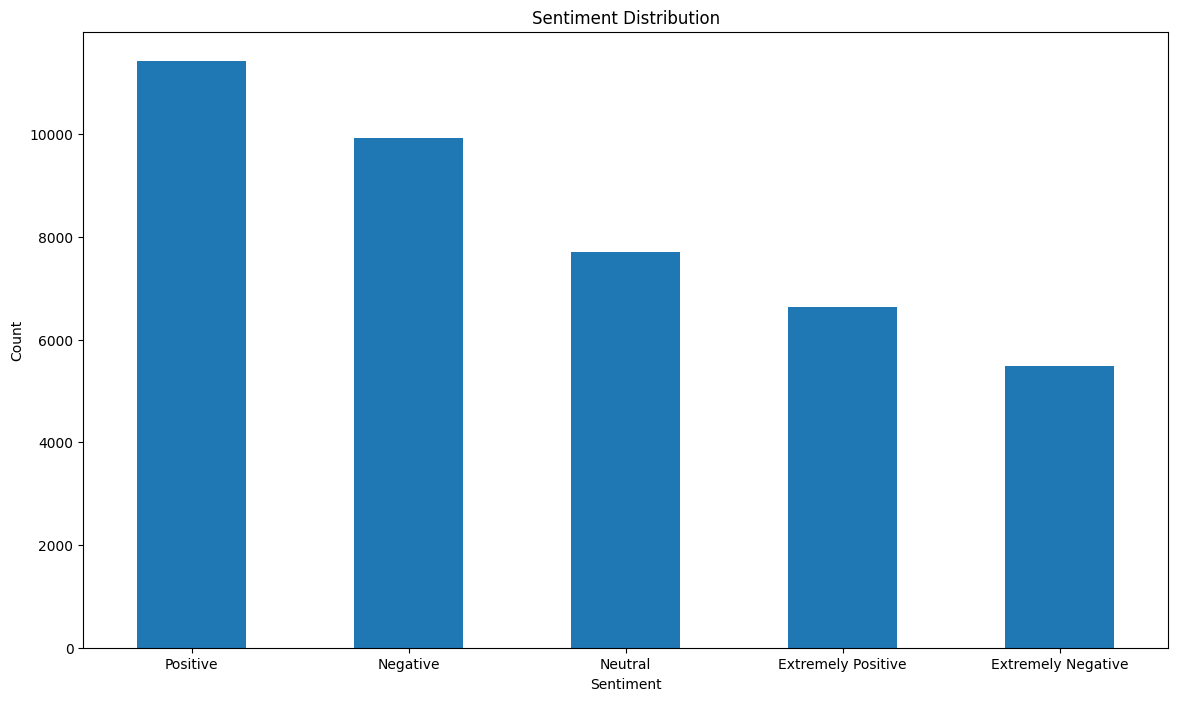

In [67]:
import matplotlib.pyplot as plt
sentiment_distribution = data['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', rot=0)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##**Sentiment bar chart:** The above distribution is on sentiment data that show positionve is heigher than others.

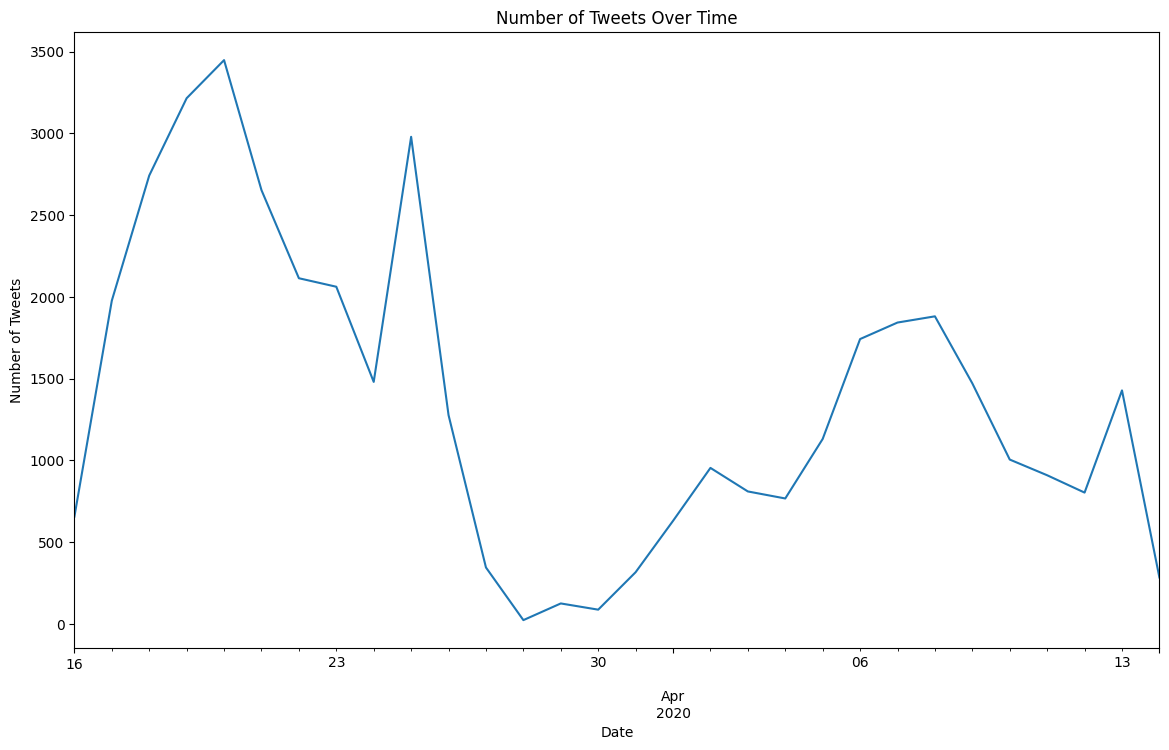

In [68]:
# Frist converting 'TweetAt' data to datetime format,
data['TweetAt'] = pd.to_datetime(data['TweetAt'], format='%d-%m-%Y')

# Then ploting the number of tweets over time
data.groupby('TweetAt').size().plot(legend=False)
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

##**Line graph of tweet:**  The line graph is shown that there are highest tweets have on June, 2020. But it has been fluctuated over time.

In [69]:
from datetime import datetime
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import folium
from folium.plugins import MarkerCluster
import nltk

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
!pip install pandas nltk matplotlib

In [71]:
!pip install vaderSentiment

In [72]:
analyser=SentimentIntensityAnalyzer()

In [73]:
from wordcloud import WordCloud, STOPWORDS
import string
from nltk import  PorterStemmer
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns


In [74]:
def clean_and_tokennize(text):
  ps=PorterStemmer()
  text_cleaned = re.sub(r'http\S+', '', text)
  text_cleaned = re.sub(r'[^a-zA-Z\s]', '', text)
  text_cleaned="".join([x for x in text if x is not string.punctuation])
  text_cleaned=re.sub(' +',' ',text_cleaned)
  text_cleaned=text_cleaned.lower()
  tokens=text_cleaned.split(" ")
  tokens=[token for token in tokens if token not in STOPWORDS]
  text_cleaned=" ".join([ps.stem(token) for token in tokens])

  return text_cleaned

##**Cleaning and Tokenizing:** the above function has been cleaned and tokenized for the Tweet text.

In [75]:
data['cleaned_tweets']=data['OriginalTweet'].apply(lambda x:clean_and_tokennize(x))
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv https://t.co/if...
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ..."
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,"food stock one empty...\r\r\n\r\r\nplease, pan..."
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak.\r\..."
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,airlin pilot offer stock supermarket shelv #nz...
41153,44952,89904,NaN,2020-04-14,Response to complaint not provided citing COVI...,Extremely Negative,respons complaint provid cite covid-19 relat d...
41154,44953,89905,NaN,2020-04-14,You know itÂs getting tough when @KameronWild...,Positive,know itâ get tough @kameronwild ration toilet...
41155,44954,89906,NaN,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanit start turn on?\r\r\n\r\...


##**Tokenized clean tweets:** the above cleaned_tweets column show clean and tokenized original tweet which we have to analysis.

In [76]:
print(data.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'cleaned_tweets'],
      dtype='object')


In [77]:
print(data[['cleaned_tweets', 'Sentiment']].head())

                                      cleaned_tweets           Sentiment
0  @menyrbi @phil_gahan @chrisitv https://t.co/if...             Neutral
1  advic talk neighbour famili exchang phone numb...            Positive
2  coronaviru australia: woolworth give elderly, ...            Positive
3  food stock one empty...\r\r\n\r\r\nplease, pan...            Positive
4  me, readi go supermarket #covid19 outbreak.\r\...  Extremely Negative


##**Summary of data:** we can see from the above there are cleaned tweet and sentiment data columns.

In [78]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [79]:
data['tweet_score']=data['OriginalTweet'].apply(lambda x:compound_score(x))
data


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets,tweet_score
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv https://t.co/if...,0.0000
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...,0.2500
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ...",0.4588
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,"food stock one empty...\r\r\n\r\r\nplease, pan...",0.8731
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak.\r\...",0.7161
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,airlin pilot offer stock supermarket shelv #nz...,0.0000
41153,44952,89904,NaN,2020-04-14,Response to complaint not provided citing COVI...,Extremely Negative,respons complaint provid cite covid-19 relat d...,-0.6369
41154,44953,89905,NaN,2020-04-14,You know itÂs getting tough when @KameronWild...,Positive,know itâ get tough @kameronwild ration toilet...,0.4184
41155,44954,89906,NaN,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanit start turn on?\r\r\n\r\...,0.0258


##**Tweet score and category:** we can see form the above that data has been created tweet_score and tweet category clumns with values.

In [80]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [81]:
data['tweet_category']=data['tweet_score'].apply(lambda x :sentiment_category(x))
print(data[['tweet_score', 'tweet_category']].head())

   tweet_score tweet_category
0       0.0000        neutral
1       0.2500       positive
2       0.4588       positive
3       0.8731       positive
4       0.7161       positive


##**Summary of tweet score and category:** we can see from the above there are tweet_score and tweet_category data columns.

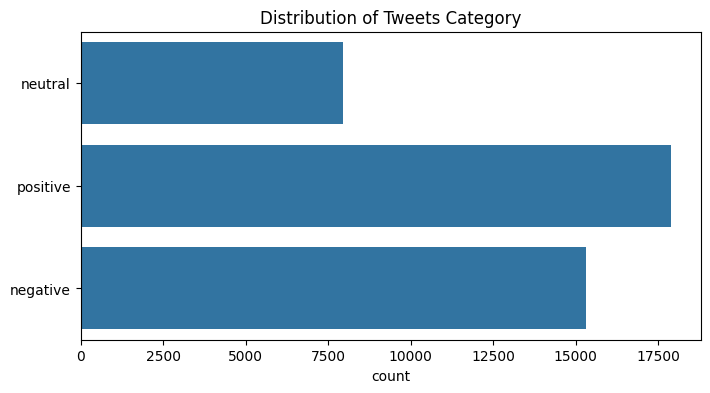

In [82]:
# Creating the countplot of 'tweet_category'
ax = sns.countplot(data['tweet_category'])

# Setting the title of the plot as "Distribution of Tweets Category"
ax.set_title("Distribution of Tweets Category")

# Removing the label for the y-axis.
ax.set_ylabel('')

# Setting the figure size as (8, 4)
plt.gcf().set_size_inches(8, 4)

# Showing the plot as below.
plt.show()

##**Result of tweets category:** we can see from the aboe bar chart that hight is positive and second is negative.

In [83]:
positive_reviews=data.loc[data['tweet_category']=='positive','cleaned_tweets'].tolist()
positive_reviews[0:10]

['advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'coronaviru australia: woolworth give elderly, disabl dedic shop hour amid covid-19 outbreak https://t.co/binca9vp8p',
 'food stock one empty...\r\r\n\r\r\nplease, panic, will enough food everyon take need. \r\r\nstay calm, stay safe.\r\r\n\r\r\n#covid19fr #covid_19 #covid19 #coronaviru #confin #confinementot #confinementgener https://t.co/zrlg0z520j',
 'me, readi go supermarket #covid19 outbreak.\r\r\n\r\r\nnot paranoid, food stock litterali empty. #coronaviru seriou thing, please, panic. caus shortage...\r\r\n\r\r\n#coronavirusfr #restezchezv #stayathom #confin https://t.co/usmualq72n',
 'news regionâ\x92 first confirm covid-19 case came sullivan counti last week, peopl flock area store purchas clean supplies, hand sanitizer, food, toilet paper goods, @tim_dodson report https://t.co/cfxch7a2lu',
 'cashier g

##**Positive reviews:**we can see from the above that all positive reviews about COVID-19 disease.



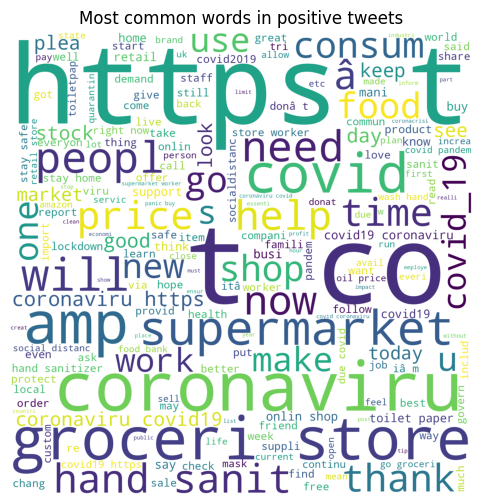

In [84]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='White')
wordcloud = wordcloud.generate(' '.join(data.loc[data['tweet_category']=='positive','cleaned_tweets'].tolist()))
plt.imshow(wordcloud)
plt.gcf().set_size_inches(10, 6)
plt.title("Most common words in positive tweets")
plt.axis('off')
plt.show()

##**Positive most common words:** we can see from the above plot, there are shown most common positive words of COVID-19 diesease.

In [85]:
negative_reviews=data.loc[data['tweet_category']=='negative','cleaned_tweets'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:10]

['corona prevention,w stop buy thing cash use onlin payment method corona spread notes. prefer onlin shop home. time fight covid 19?. #govindia #indiafightscorona',
 '100 nation infict covid 19 world must play fair china 100 gover must demand china adopt new guild line food safti chines gover guilti irosponc life global scale',
 '@10downingstreet @grantshapp done ensur food essenti product re-stock supermarket panic buy activ discouraged? left checkout staff polic action selfish profit',
 'prepar higher demand potenti food shortage, hunger coalit purchas 10 percent food implement new protocol due covid-19 coronavirus. https://t.co/5cecytlnyn',
 'morn test posit covid 19. feel ok, symptom far isol found possibl exposur virus. stay home peopl pragmatic. will keep updat iâ\x92m ???? panic. https://t.co/lg7hvmzglz',
 'see malici price increas nyc? nyc depart consum worker protect (dcwp) set page digit file complaint. click here: https://t.co/oex6y8mm2k\r\r\n\r\r\nto file complaint (use wor

##**Negative reviews:**we can see from the above that all negative reviews about COVID-19 disease.

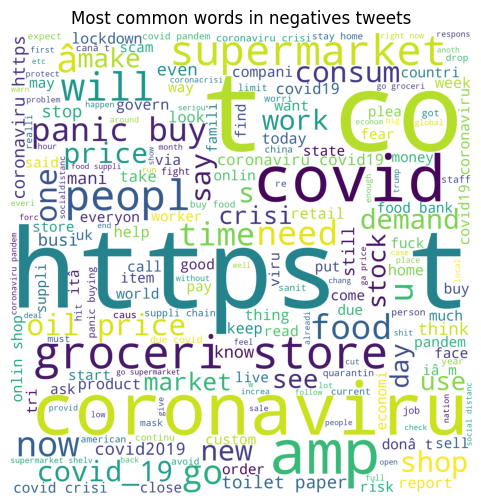

In [86]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='White')
wordcloud = wordcloud.generate(' '.join(data.loc[data['tweet_category']=='negative','cleaned_tweets'].tolist()))
plt.imshow(wordcloud)
plt.gcf().set_size_inches(6, 6)
plt.title("Most common words in negatives tweets")
plt.axis('off')
plt.show()

##**Negative most common words:** we can see from the above plot, there are shown most common negative words of COVID-19 disease.

In [87]:
from collections import Counter
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")


    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

In [88]:
getMostCommon(data['cleaned_tweets'].tolist(),topn=30)

[('#coronaviru', 12958),
 ('price', 7530),
 ('store', 6600),
 ('groceri', 6264),
 ('supermarket', 6171),
 ('food', 6029),
 ('covid-19', 5369),
 ('peopl', 4999),
 ('consum', 4656),
 ('will', 4488),
 ('shop', 4086),
 ('go', 4033),
 ('#covid19', 3974),
 ('&amp;', 3566),
 ('19', 3413),
 ('need', 3205),
 ('onlin', 2958),
 ('covid', 2827),
 ('work', 2640),
 ('buy', 2635),
 ('#covid_19', 2539),
 ('hand', 2502),
 ('time', 2450),
 ('help', 2419),
 ('now', 2240),
 ('stock', 2222),
 ('-', 2163),
 ('panic', 2148),
 ('worker', 2091),
 ('make', 2072)]

##**Most common reviews:** we can see from the above list that there are showing most most common reviews for COVID-19 disease.

In [89]:
reviews_list=data['cleaned_tweets'].tolist()

In [90]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Tweets Words",color="green",axis=None):
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

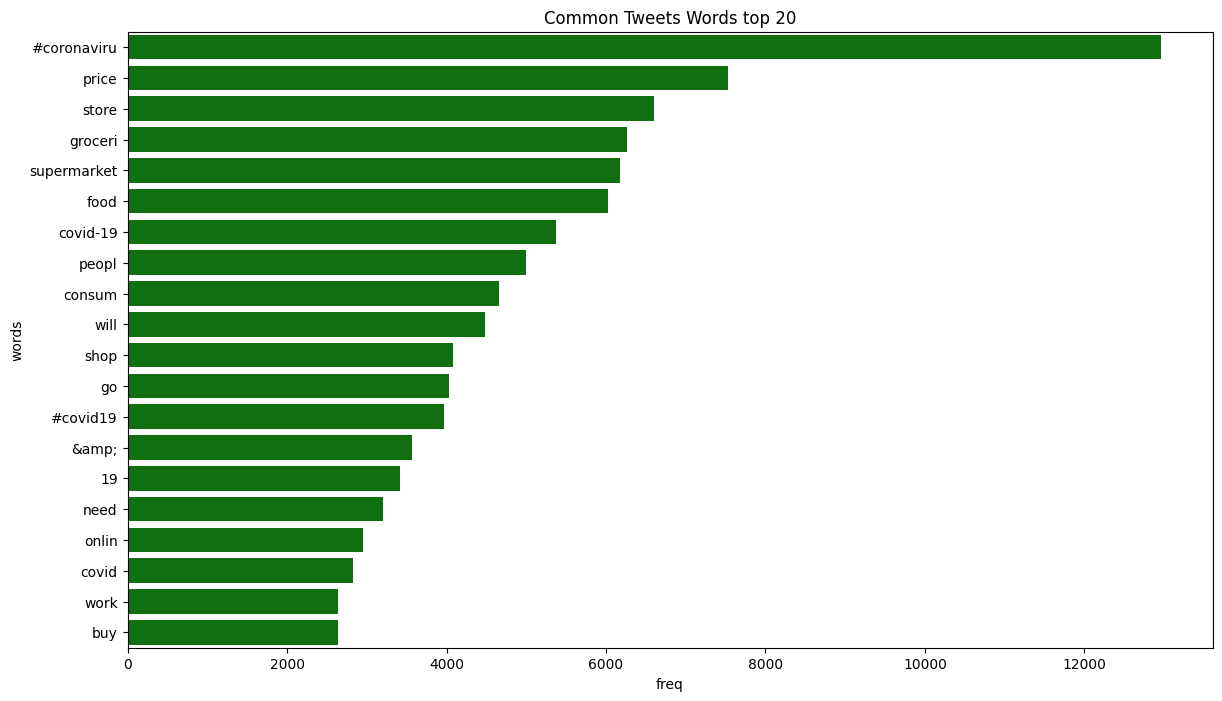

In [91]:
plotMostCommonWords(reviews_list)

## **Most common barplot:** we can see from the above barplot of most common tweet words of COVid-19 data set, there are highest common words are coronaviiru.

In [92]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

top_20_positive_review_words

[('#coronaviru', 5420),
 ('store', 3146),
 ('groceri', 2985),
 ('price', 2718),
 ('supermarket', 2624),
 ('food', 2437),
 ('covid-19', 2187),
 ('consum', 2101),
 ('will', 2068),
 ('peopl', 2033),
 ('hand', 2024),
 ('shop', 1984),
 ('help', 1928),
 ('&amp;', 1815),
 ('#covid19', 1793),
 ('go', 1722),
 ('19', 1558),
 ('need', 1540),
 ('onlin', 1520),
 ('sanit', 1409)]

In [93]:
top_20_negative_review_words=getMostCommon(negative_reviews,30)
top_20_negative_review_words

[('#coronaviru', 4711),
 ('price', 3669),
 ('food', 3017),
 ('supermarket', 2399),
 ('peopl', 2386),
 ('store', 2174),
 ('covid-19', 2154),
 ('groceri', 2089),
 ('will', 1798),
 ('panic', 1727),
 ('go', 1692),
 ('consum', 1544),
 ('buy', 1476),
 ('19', 1375),
 ('&amp;', 1360),
 ('shop', 1337),
 ('need', 1252),
 ('#covid19', 1220),
 ('covid', 1174),
 ('demand', 1105),
 ('work', 966),
 ('#covid_19', 939),
 ('time', 938),
 ('oil', 918),
 ('now', 871),
 ('crisi', 869),
 ('due', 843),
 ('stock', 842),
 ('-', 827),
 ('stop', 819)]

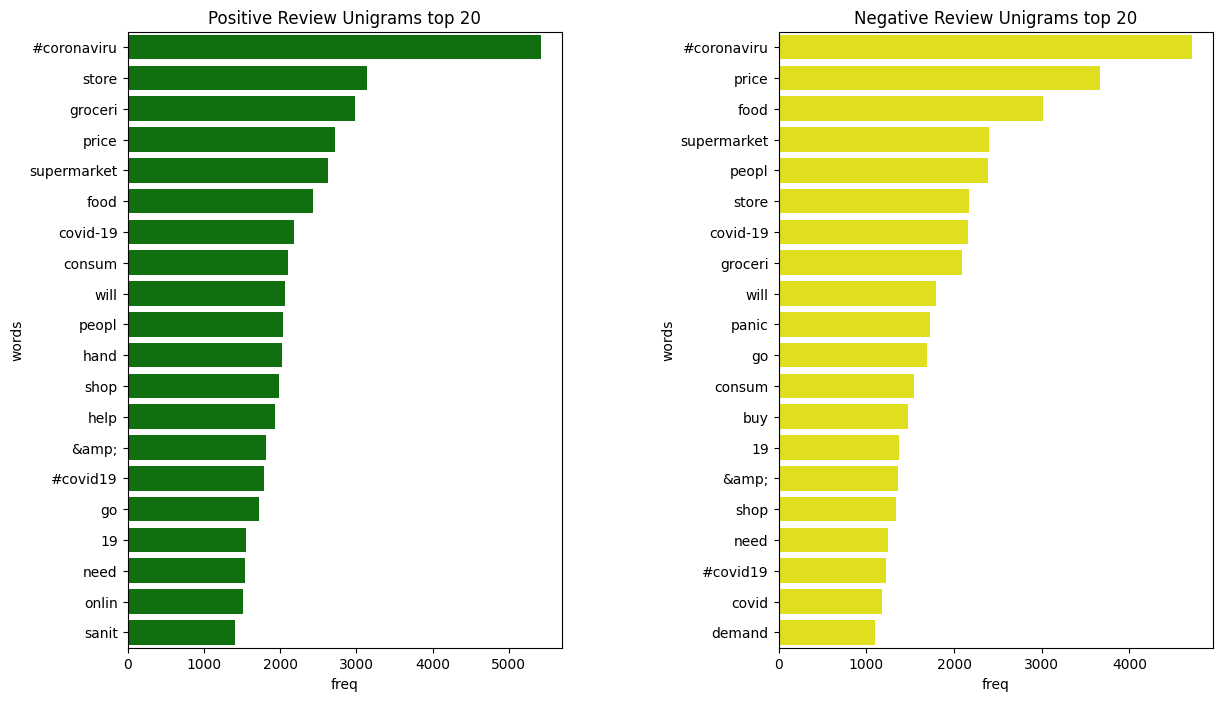

In [94]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 14,8 ## Sets the heigth and width of image
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])
plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="yellow",axis=ax[1])


## **Positive and negarive words:** we can see from the above two sub bar plots, there are most common words "coronavirus"  is highest and same numbers of positive and regative data.

In [95]:
import geopandas as gpd

In [96]:
# Assuming df is your DataFrame
df_location = data['Location'][data['tweet_category'] == 'negative']

# Extract locations from the filtered DataFrame
negative_locations = df_location.tolist()

#negative_locations

In [97]:
my_list = [value for value in negative_locations if value == value]

my_list = list(filter(lambda x: x == x, my_list))

In [98]:
from collections import Counter
import matplotlib.pyplot as plt

# Data cleaning: Remove empty values and strip whitespace
cleaned_locations = [loc.strip() for loc in my_list if loc]

# Count occurrences of each location
location_counts = Counter(cleaned_locations)

# Get the most common locations
most_common_locations = location_counts.most_common(20)

# Print the most common locations
print("Most common locations with negative effects:")
for location, count in most_common_locations:
    print(f"{location}: {count}")


Most common locations with negative effects:
London: 215
London, England: 194
United States: 168
United Kingdom: 138
Washington, DC: 133
New York, NY: 130
India: 97
Australia: 88
Los Angeles, CA: 87
UK: 87
USA: 85
England, United Kingdom: 79
Global: 72
Canada: 70
Toronto, Ontario: 57
California, USA: 56
Chicago, IL: 54
New York, USA: 46
San Francisco, CA: 44
Boston, MA: 43


## **Most common location:** we can see from the above result, there are most common 20 locations with negative effects count. London is the higest number (216) of egative effects

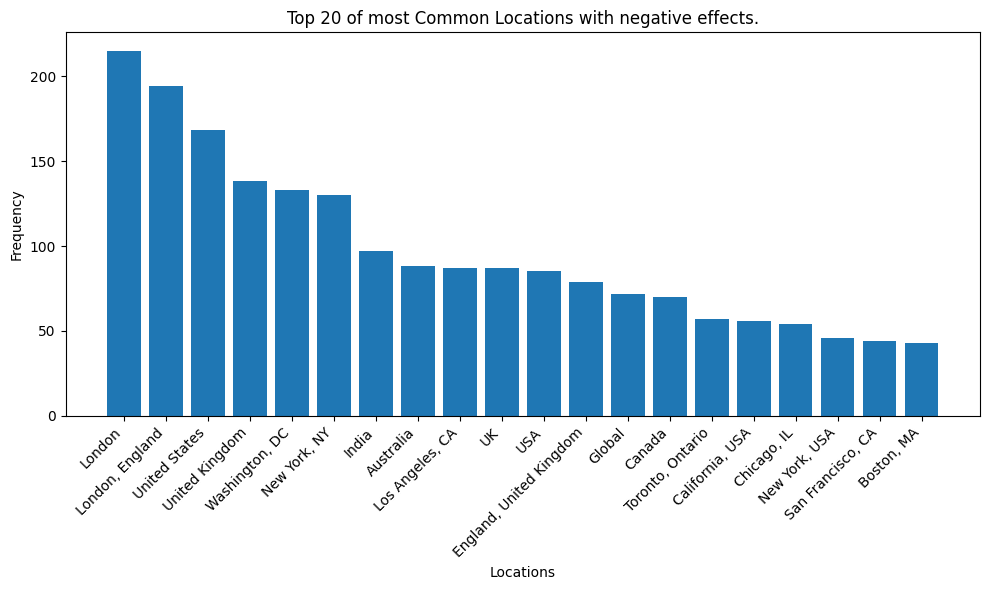

In [99]:
# Optional: Visualize the data
labels, counts = zip(*most_common_locations)
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel('Locations')
plt.ylabel('Frequency')
plt.title('Top 20 of most Common Locations with negative effects.')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Outcomes/results:** we can see from the above bar chart that based on the analysis of the provided list of locations, several key insights can be drawn:

**1. Verieties of Locations:** The above barplot includes a wide variety of locations from around the world, indicating a diverse audience or contributors.

**2. Similar Locations:** there are certain locations appear more frequently than others. So, it says that some regions or cities are more represented in the dataset.

**3. Global Reach:** The presence of locations from different continents highlights the global reach of the project or dataset.

**4. Data Quality:** The presence of NaN values indicates potential inconsistencies or missing data. These should be handled appropriately to ensure the accuracy of any analysis or conclusions drawn from the dataset.

###* Thanks All*